# 19. Multiple Choice Questions

## Today we will deal with questions that have many answers. 
### That is:```['Q16_text', 'Q9_text', 'Q28_text', 'Q29_text', 'Q31_text']```

### First: run this cell to load the survey

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import ast 

survey = pd.read_csv('/Users/nadzi/Documents/Datasets/Shanghai Thomas Survey/Shanghai_Thomas_Survey_datasets/CSV ready/survey.csv')

survey

,Index,Q1_text,Q1_code,Q2_text,Q2_code,Q3_text,Q3_code,Q4_text,Q4_code,Q5_text,...,Q30_code,Q31_text,Q31_code,Q32_text,Q32_code,Q33_text,Q33_code,Q34_text,Q34_code,Q29 text
0,6101,Grade 6,1,Male,1,I live with my parents,2,No,2,NaN,...,1,['Bilibili'],6,Never,1,Sometimes (Every other week),3,NaN,-1,NaN
1,6102,Grade 6,1,Male,1,I live with my parents,2,Yes,1,One,...,1,"['WeChat', 'Xiaohongshu', 'Other']","1,4,8",Every day,5,Often (2-3 times a week),5,NaN,-1,NaN
2,6103,Grade 6,1,Male,1,I live with my grandparents,3,No,2,NaN,...,1,"['WeChat', 'Xiaohongshu', 'Other']","1,4,8",Never,1,Often (2-3 times a week),5,NaN,-1,NaN
3,6104,Grade 6,1,Female,2,I live with my parents,2,No,2,NaN,...,2,"['WeChat', 'TikTok (Douyin)', 'Xiaohongshu']","1,2,4",Once or twice per month,2,Often (2-3 times a week),5,NaN,-1,NaN
4,6105,Grade 6,1,Male,1,I live with my parents,2,Yes,1,One,...,1,['Other'],8,Once or twice per month,2,Never,1,NaN,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,C7,Grade 8,3,Female,2,I live with my parents,2,No,2,NaN,...,1,"['WeChat', 'TikTok (Douyin)', 'Other']","1,2,8",Once or twice per month,2,Occasionally (Once a month),2,Class A,1,NaN
144,C8,Grade 7,2,Female,2,I live with my parents,2,Yes,1,One,...,3,"['WeChat', 'Xiaohongshu', 'Bilibili']","1,4,6",Once or twice per month,2,Often (2-3 times a week),5,Class A,1,NaN
145,C9,Grade 8,3,Female,2,I live in the dorm,1,Yes,1,One,...,1,"['WeChat', 'TikTok (Douyin)', 'Bilibili']","1,2,6",Once or twice per month,2,Regularly (Once a week),4,Class A,1,NaN
146,C10,Grade 7,2,Female,2,I live in the dorm,1,No,2,NaN,...,2,"['WeChat', 'TikTok (Douyin)', 'Xiaohongshu']","1,2,4",Never,1,Regularly (Once a week),4,Class A,1,NaN


## Clean the columns with multiple answers.

## You must run this cell!

### Before we do anything, we need "clean" the columns to make them ready. To do that you need to run the code below:

In [25]:
# Define multiple-choice columns
multi_choice_columns = ['Q16_text', 'Q9_text', 'Q28_text', 'Q29_text', 'Q31_text']

def clean_list_string(s):
    """Convert a string to a list and clean each item."""
    try:
        items = ast.literal_eval(s)
        if isinstance(items, list):
            return [item.strip("[]'\" ").strip() for item in items if item.strip("[]'\" ").strip()]
    except:
        pass
    return []

# Create a cleaned copy of the original survey
survey = survey.copy()

# Clean each multiple-choice column
for col in multi_choice_columns:
    if col in survey.columns:
        survey[col] = survey[col].apply(clean_list_string)

# Optionally drop rows where all multi-choice columns are empty
survey = survey[survey[multi_choice_columns].applymap(bool).any(axis=1)]

# Check cleaned result
print("The cleaning is done")


The cleaning is done


/var/folders/tt/btlv0gfs7sb7jp967ssxpc500000gn/T/ipykernel_2129/911555014.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  survey = survey[survey[multi_choice_columns].applymap(bool).any(axis=1)]


## 1. Counts for multiple choice questions
### Here's how you can get the counts for each multiple choice question. 

In [26]:
survey.explode('Q9_text')['Q9_text'].value_counts()

Q9_text
Novels              91
Comic books         59
Short stories       57
School materials    57
Non-fiction         23
Other               10
Name: count, dtype: int64

In [27]:
survey.explode('Q31_text')['Q31_text'].value_counts()


Q31_text
WeChat             111
Bilibili            51
Xiaohongshu         46
TikTok (Douyin)     45
Other               44
QQ                  18
Kuaishou            16
Weibo               16
Name: count, dtype: int64

## Your task: see counts for these 3 questions 'Q16_text', 'Q28_text', 'Q29_text'

In [ ]:
survey.explode('QXX_text')['QXX_text'].value_counts()

## 2. Percentages for multiple choice questions

In [28]:
Q9_percentages = survey.explode('Q9_text')['Q9_text'].value_counts(normalize=True).round(2) * 100
Q9_percentages

Q9_text
Novels              31.0
Comic books         20.0
Short stories       19.0
School materials    19.0
Non-fiction          8.0
Other                3.0
Name: proportion, dtype: float64

In [29]:
Q31_percentages = survey.explode('Q31_text')['Q31_text'].value_counts()
Q31_percentages

Q31_text
WeChat             111
Bilibili            51
Xiaohongshu         46
TikTok (Douyin)     45
Other               44
QQ                  18
Kuaishou            16
Weibo               16
Name: count, dtype: int64

## Your task: see percentages for these 3 questions 'Q16_text', 'Q28_text', 'Q29_text'

QXX_percentages = survey.explode('QXX_text')['QXX_text'].value_counts()
QXX_percentages

## 3. Easy bar charts 

You can make the easiets horizontal bar charts with this one line of code:

<Axes: ylabel='Q9_text'>

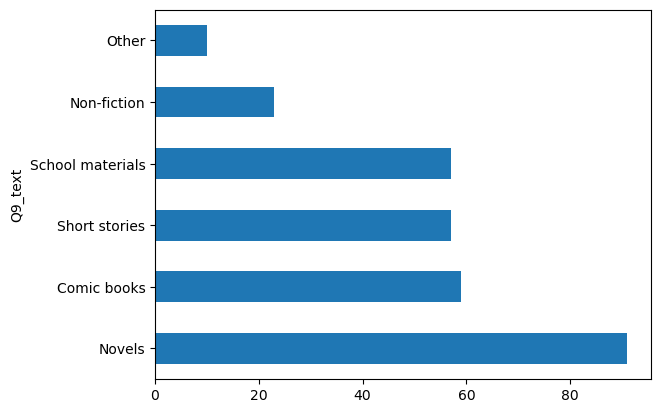

In [32]:
survey.explode('Q9_text')['Q9_text'].value_counts().plot(kind='barh')


## Your task: make bar charts for these questions questions 'Q16_text', 'Q28_text', 'Q29_text', 'Q31_text'

In [ ]:
survey.explode('QX_text')['QX_text'].value_counts().plot(kind='barh')